In [1]:
import rbm_2way as rbm2
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
def generate_v(num_visible,theta=0.5):

    ones = np.random.binomial(num_visible,theta)
    v = np.random.permutation(np.concatenate([np.ones(ones),np.zeros(num_visible-ones)]))

    return v


n_visible = 10
n_hidden = 50
n_samples = 5000

vs = []

for n in range(n_samples):
    v = generate_v(n_visible,0.4)
    v = v.astype(np.float32)
    vs.append(v)
    
vs = np.stack(vs)

vs[0].T

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

squared reconstruction error: 15873.0: 100%|██████████| 100/100 [02:34<00:00,  1.98s/it]


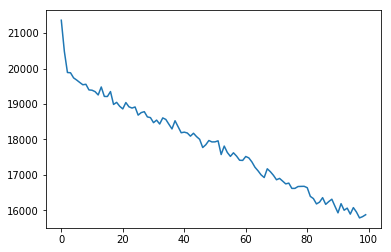

In [4]:
with tf.Session() as sess:
    RBM = rbm2.RBM(name='rbm'
               ,input_size=n_visible
               ,output_size=n_hidden)
    init = tf.global_variables_initializer()
    sess.run(init)
    costs = []
    pbar = tqdm(range(100))
    for i in pbar:
        w = sess.run(RBM.cd1(vs, learning_rate=0.1))
        cost = sess.run(RBM.reconstruction_error(vs))
        costs.append(cost)
        pbar.set_description('squared reconstruction error: {}'.format(cost))
        if i % 20 == 0:
            #plt.hist(w[0],bins=20)
            #plt.title(i)
            #plt.show()
            pass
    plt.plot(range(len(costs)),costs)
    plt.show()

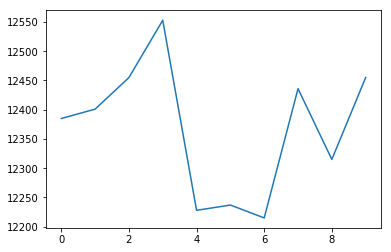

In [82]:
plt.plot(range(len(costs)),costs)
plt.show()

In [59]:
a = tf.Variable(tf.truncated_normal([1, 2],
                    stddev=1.0 / math.sqrt(float(1))), name="weights")
b = tf.constant([5.,6.])
c = tf.add(a,b)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(c))

[[ 5.49153137  6.58376789]]


In [4]:
vs.shape

(500, 10)

In [8]:
a= tf.constant([1,2])

a.get_shape().as_list()

AttributeError: 'TensorShape' object has no attribute 'to_list'